In [70]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import rasterio.mask as rmask
import fiona as fio

In [71]:
def read_landsat_images(path) -> dict:

    files = os.listdir(path)
    bands = [value for value in files if value.endswith('.tif') and 'band' in value]
    other_rasters = [value for value in files if value.endswith('.tif') and 'band' not in value]

    rasters = bands + other_rasters
    
    return {index: os.path.join(path, value) for index, value in enumerate(rasters, start=1)}


path = "LC08/"

rasters_dict = read_landsat_images(path)
rasters_dict

{1: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band1.tif',
 2: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band2.tif',
 3: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band3.tif',
 4: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band4.tif',
 5: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band5.tif',
 6: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6.tif',
 7: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band7.tif',
 8: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_pixel_qa.tif',
 9: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_radsat_qa.tif',
 10: 'LC08/LC08_L1TP_188025_20130807_20170503_01_T1_sr_aerosol.tif'}

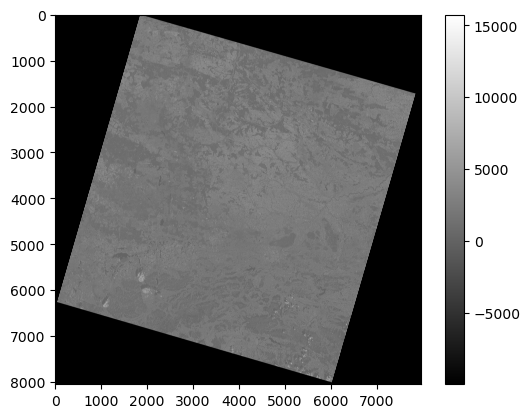

In [72]:
def show_band(band, color_map="gray") -> None:

    with rio.open(band) as src:
        raster = src.read(1).astype('float64')

    plt.imshow(raster, cmap=color_map)
    plt.colorbar()
    plt.show()

show_band(rasters_dict[6])


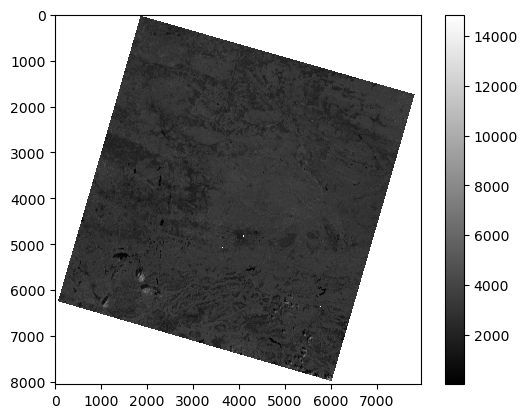

In [73]:
def show_band2(band, color_map="gray", remove_negative=True) -> None:

    with rio.open(band) as src:
        raster = src.read(1).astype('float64')
    
        if remove_negative:
            raster = np.where(raster < 0, np.nan, raster)

    plt.imshow(raster, cmap=color_map)
    plt.colorbar()
    plt.show()

show_band2(rasters_dict[5])

In [106]:
def clip_area(vector_file, raster_file, save_image_to) -> None:

    with fio.open(vector_file, 'r') as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rio.open(raster_file) as src:
        out_image, out_transform = rio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    try: 
        with rio.open(save_image_to, "w", **out_meta) as dest:
            dest.write(out_image)
        print(f"Raster zapisany pomyślnie w {save_image_to}")

    except Exception as e:
        print(f"Wystąpił błąd podczas zapisywania rastra: {e}")



clip_folder = path + 'clip/'

if not os.path.exists(clip_folder):
    os.makedirs(clip_folder)
    print(f"Folder '{clip_folder}' został utworzony.")

for band, raster in rasters_dict.items():

    file_name = os.path.basename(raster).split('.tif')[0] + "_clip.tif"
    output_file = os.path.join(clip_folder, file_name)
    
    clip_area("LC08/krakow_krakowskie.shp", raster, output_file)

Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band1_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band2_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band3_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band4_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band5_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band7_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_pixel_qa_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_radsat_qa_clip.tif
Raster zapisany pomyślnie w LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_aerosol_clip.tif


In [107]:
clipped_rasters = read_landsat_images(clip_folder)
clipped_rasters

{1: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band1_clip.tif',
 2: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band2_clip.tif',
 3: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band3_clip.tif',
 4: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band4_clip.tif',
 5: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band5_clip.tif',
 6: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band6_clip.tif',
 7: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_band7_clip.tif',
 8: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_pixel_qa_clip.tif',
 9: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_radsat_qa_clip.tif',
 10: 'LC08/clip/LC08_L1TP_188025_20130807_20170503_01_T1_sr_aerosol_clip.tif'}

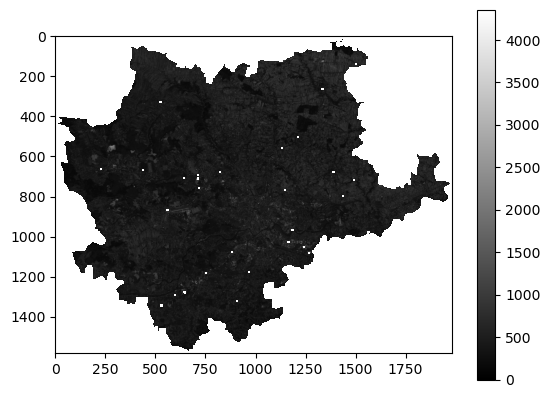

In [108]:
show_band2(clipped_rasters[2])

Raster zapisany pomyślnie w LC08/indices/LC08_L1TP_188025_20130807_20170503_01_T1_sr_NDVI.tif


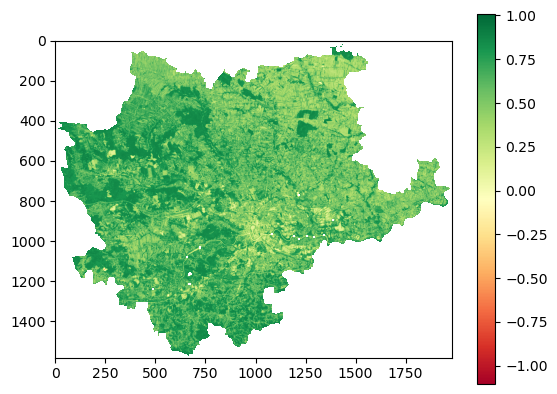

Raster zapisany pomyślnie w LC08/indices/LC08_L1TP_188025_20130807_20170503_01_T1_sr_NDWI.tif


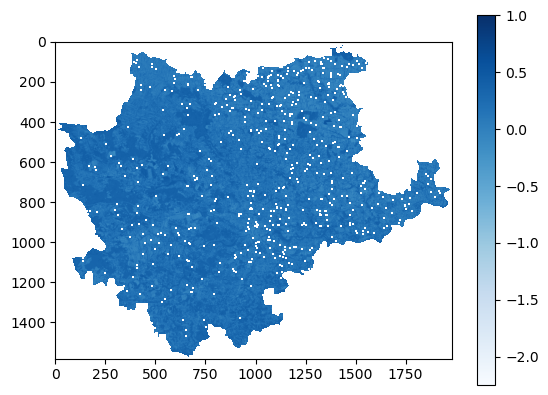

Raster zapisany pomyślnie w LC08/indices/LC08_L1TP_188025_20130807_20170503_01_T1_sr_MNDWI.tif


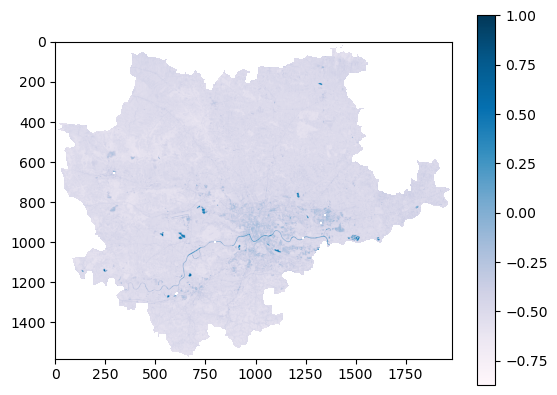

Raster zapisany pomyślnie w LC08/indices/LC08_L1TP_188025_20130807_20170503_01_T1_sr_NDBI.tif


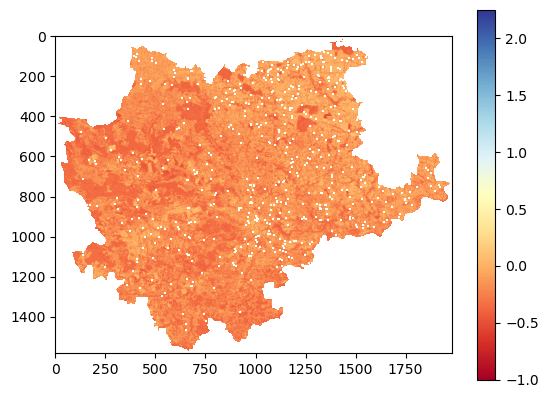

In [118]:
def calculate_indice(indice, channel1, channel2, save_image_to) -> plt.figure:

    with rio.open(channel1) as ch1, rio.open(channel2) as ch2:

        raster_1 = ch1.read(1).astype('float64')
        raster_2 = ch2.read(1).astype('float64')

        indice_raster = np.where(raster_1 - raster_2 == 0, np.nan, (raster_1 - raster_2) / (raster_1 + raster_2))
        out_meta = ch1.meta
        out_meta.update(dtype=rio.float64, count=1)

        try: 
            with rio.open(save_image_to, "w", **out_meta) as dest:
                dest.write(indice_raster, 1)
            print(f"Raster zapisany pomyślnie w {save_image_to}")

        except Exception as e:
            print(f"Wystąpił błąd podczas zapisywania rastra: {e}")

        if indice == 'NDVI':
            cmap = 'RdYlGn'
        elif indice == 'NDWI':
            cmap ='Blues'
        elif indice == 'MNDWI':
            cmap ='PuBu'
        elif indice == 'NDBI':
            cmap = 'RdYlBu'

    return show_band(save_image_to, cmap)



indices_folder = path + 'indices/'

if not os.path.exists(indices_folder):
    os.makedirs(indices_folder)
    print(f"Folder '{indices_folder}' został utworzony.")

indices_dict = {
    'NDVI': (clipped_rasters[5], clipped_rasters[4]),
    'NDWI': (clipped_rasters[5], clipped_rasters[6]),
    'MNDWI': (clipped_rasters[3], clipped_rasters[6]),
    'NDBI': (clipped_rasters[6], clipped_rasters[5])
    }


for indice, bands in indices_dict.items():

    file_name = os.path.basename(bands[0]).split('band')[0] + indice + ".tif"
    output_path = os.path.join(indices_folder, file_name)
    
    calculate_indice(indice, bands[0], bands[1], output_path)